# Pointing Experiment

## Testdesign

In our study we want to implement an experiment about pointing devices. For this, we have developed a hypothesis that we want to either confirm or reject through our experiment. Our hypothesis is, that completion time and errors increase if the user is exposed to multiple visual stimuli. In our case, the different stimuli are different colors and geometric shapes among which the subject has to find the right one.
 Therefore we have developed three conditions with different levels of difficulty:
 
    1. Circles of different sizes are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
    2. Circles of different sizes and colors are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
    3. Varying geometric shapes of different sizes and colors are displayed on the screen. One circle is blue, the test person has to click on it as fast as possible.
    
Each object is clickable, the participants have to click on the right one, otherwise it would be an error. Each condition is repeated five times, so that there are 15 rounds in total and in a counter-balanced order. 
In Addition we also implemented a improved pointing technique. Therefore pur second hypothesis is, that participants who use the improved pointing technique should complete the task faster.

### Participants

To conduct a good study our participants should be as diverse as possible to avoid biased results. Due to limited resources, this study is only conducted by two female participants, both of whom have good computer skills. This should be taken into account in the results and in studies based on them.

### Setup

In order to create a comparable setup, this was discussed and determined before conducting the study. We used a Laptop with a screen size of 13 inches and a mouse as the pointing device. The participants are seated in a closed room to minimize disturbing influences such as noise or dazzling light.

### Variables

Two independent variables were defined for the study, which also resulted in two dependent variables. The independent variables are the color and the shape of the objects and the dependent variables the reaction time and the error.
We also have five controlled variables which are the pointing device (mouse), screen resolution, screen size, screen position, environment. As previously said, we determined the setup before to minimize their influence.


## Import packages

In [32]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

## Import csv and grouping of data

In [39]:
# import csv data
df_data1 = pd.read_csv('data1.csv')
df_data2 = pd.read_csv('data2.csv')
df_data3 = pd.read_csv('data3.csv')
df_data4 = pd.read_csv('data4.csv')
df_data5 = pd.read_csv('data5.csv')
df_data6 = pd.read_csv('data6.csv')
df_data7 = pd.read_csv('data7.csv')
df_data8 = pd.read_csv('data8.csv')
df_data5

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
0,2021-05-07T12:46:41,1,1,125,20,860,1175,453,1057,637,True,True
1,2021-05-07T12:46:42,1,3,50,20,1657,1057,637,295,235,True,True
2,2021-05-07T12:46:43,1,2,75,20,1030,295,235,1742,242,True,True
3,2021-05-07T12:46:45,1,2,125,20,1389,1742,242,137,217,True,True
4,2021-05-07T12:46:46,1,1,125,20,885,137,217,1357,497,True,True
5,2021-05-07T12:46:47,1,1,100,20,1269,1357,497,1010,590,True,True
6,2021-05-07T12:46:48,1,3,125,20,837,1010,590,497,197,True,True
7,2021-05-07T12:46:49,1,3,100,20,1090,497,197,1710,350,True,True
8,2021-05-07T12:46:50,1,1,100,20,1587,1710,350,730,670,True,True
9,2021-05-07T12:46:52,1,2,125,20,1445,730,670,237,577,True,True


In [40]:
# grouping csv data in one document
df_pointing_experiment = pd.concat([df_data1, df_data2, df_data3, df_data4, df_data5, df_data6, df_data7, df_data8], ignore_index= True)

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
0,2021-05-07T12:25:00,1,2,125,20,1547,1024,638,1549,281,True,False
1,2021-05-07T12:25:02,1,3,50,20,2291,1549,281,1571,318,True,False
2,2021-05-07T12:25:05,1,3,50,20,2868,1571,318,945,228,False,False
3,2021-05-07T12:25:06,1,1,50,20,1116,945,228,1012,298,True,False
4,2021-05-07T12:25:08,1,2,125,20,1543,1012,298,1601,395,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-05-07T12:49:16,4,1,50,20,1250,1367,200,1581,114,True,False
116,2021-05-07T12:49:18,4,2,50,20,1811,1581,114,430,550,True,False
117,2021-05-07T12:49:19,4,3,75,20,1813,430,550,719,528,True,False
118,2021-05-07T12:49:21,4,1,50,20,1649,719,528,221,443,True,False


In [35]:
# group csv data per condition
df_cond1 = df_pointing_experiment[df_pointing_experiment['condition'] == 1]
df_cond2 = df_pointing_experiment[df_pointing_experiment['condition'] == 2]
df_cond3 = df_pointing_experiment[df_pointing_experiment['condition'] == 3]

In [41]:
# group csv data if improvement is true or false
df_impr_true = df_pointing_experiment[df_pointing_experiment['improvement'] == True]
df_impr_false = df_pointing_experiment[df_pointing_experiment['improvement'] == False]

,timestamp (ISO),user_id,condition,diameter,amount,completion_time (ms),start_pointer_x,start_pointer_y,end_pointer_x,end_pointer_y,error,improvement
15,2021-05-07T12:26:49,2,3,75,20,1182,975,436,102,302,True,True
16,2021-05-07T12:26:50,2,3,50,20,1283,102,302,415,655,True,True
17,2021-05-07T12:26:52,2,3,50,20,2126,415,655,1375,155,True,True
18,2021-05-07T12:26:53,2,3,50,20,1187,1375,155,1555,595,True,True
19,2021-05-07T12:26:54,2,2,50,20,963,1555,595,1015,395,True,True
20,2021-05-07T12:26:55,2,1,100,20,1082,1015,395,630,490,True,True
21,2021-05-07T12:26:57,2,2,50,20,1495,630,490,1115,715,True,True
22,2021-05-07T12:26:58,2,1,125,20,1237,1115,715,1017,377,True,True
23,2021-05-07T12:26:59,2,1,75,20,1088,1017,377,1482,222,True,True
24,2021-05-07T12:27:00,2,3,125,20,1001,1482,222,357,337,True,True


## Evaluation

### Completion time per condition without improvement


In [329]:
cond1_impr_false = df_cond1['completion_time (ms)'][df_cond1['improvement'] == False]
cond2_impr_false = df_cond2['completion_time (ms)'][df_cond2['improvement'] == False]
cond3_impr_false = df_cond3['completion_time (ms)'][df_cond3['improvement'] == False]

3     1116
7     1017
8     1160
12    1442
13    1614
30    2377
36    1008
39    1115
42    1640
44    1409
Name: completion_time (ms), dtype: int64

Text(0, 0.5, 'completion time in ms')

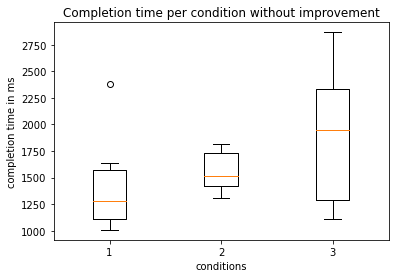

In [292]:
plt.boxplot([cond1_impr_false, cond2_impr_false, cond3_impr_false])
plt.title('Completion time per condition without improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')


### Completion time per condition and user without improvement

In [300]:
cond_user1_false = df_impr_false['condition'][df_impr_false['user_id'] == 1]
cond_user1_time_false = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 1]
cond_user2_false = df_impr_false['condition'][df_impr_false['user_id'] == 2]
cond_user2_time_false= df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 2]
cond_user3_false = df_impr_false['condition'][df_impr_false['user_id'] == 3]
cond_user3_time_false = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 3]
cond_user4_false = df_impr_false['condition'][df_impr_false['user_id'] == 4]
cond_user4_time_false = df_impr_false['completion_time (ms)'][df_impr_false['user_id'] == 4]

(0.5, 3.5)

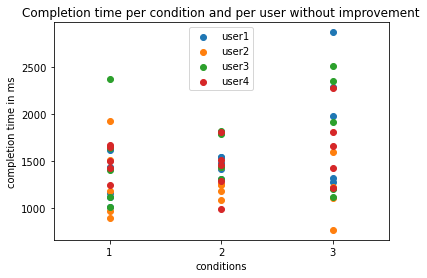

In [301]:
plt.scatter(cond_user1_false, cond_user1_time_false, label='user1')
plt.scatter(cond_user2_false, cond_user2_time_false, label='user2')
plt.scatter(cond_user3_false, cond_user3_time_false, label='user3')
plt.scatter(cond_user4_false, cond_user4_time_false, label='user4')
plt.legend(loc=0)
plt.title('Completion time per condition and per user without improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Errors per condition without improvement

In [326]:
err_cond = [1, 2, 3]
cond1_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False].count() 
cond1_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True].count()
cond2_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False].count()
cond2_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True].count()
cond3_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False].count()
cond3_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True].count()

1

(0.5, 3.5)

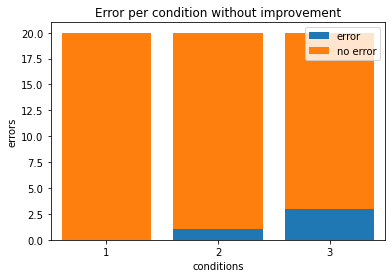

In [312]:
plt.bar(err_cond, (cond1_false, cond2_false, cond3_false), label='error')
plt.bar(err_cond, (cond1_true, cond2_true , cond3_true), bottom=(cond1_false, cond2_false, cond3_false), label='no error')
plt.title('Error per condition without improvement')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Error per condition and per user without improvement

In [275]:
cond1_user1_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond1_user1_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond1_user2_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond1_user2_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond1_user3_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond1_user3_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond1_user4_false = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond1_user4_true = df_impr_false['error'][df_impr_false['condition'] == 1][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()
cond2_user1_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond2_user1_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond2_user2_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond2_user2_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond2_user3_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond2_user3_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond2_user4_false = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond2_user4_true = df_impr_false['error'][df_impr_false['condition'] == 2][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()
cond3_user1_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 1].count() 
cond3_user1_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 1].count()
cond3_user2_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 2].count() 
cond3_user2_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 2].count()
cond3_user3_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 3].count() 
cond3_user3_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 3].count()
cond3_user4_false = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == False][df_impr_false['user_id'] == 4].count() 
cond3_user4_true = df_impr_false['error'][df_impr_false['condition'] == 3][df_impr_false['error'] == True][df_impr_false['user_id'] == 4].count()

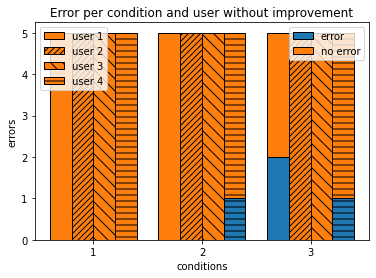

In [319]:
x  = np.arange(3)
plt.title('Error per condition and user without improvement')
width = 0.2

user1_false = plt.bar(x - 0.3, (cond1_user1_false, cond2_user1_false, cond3_user1_false), width, color='C0', 
                      edgecolor='#000000', label='error')
user1_true = plt.bar(x - 0.3, (cond1_user1_true, cond2_user1_true, cond3_user1_true), width, color='C1', 
                     edgecolor='#000000', bottom= (cond1_user1_false, cond2_user1_false, cond3_user1_false), label='user 1')

user2_false = plt.bar(x - 0.1, (cond1_user2_false, cond2_user2_false, cond3_user2_false), width, color='C0',
                      edgecolor='#000000', hatch='////')
user2_true = plt.bar(x - 0.1, (cond1_user2_true, cond2_user2_true, cond3_user2_true), width, color='C1', 
                     edgecolor='#000000', hatch='////', bottom=(cond1_user2_false, cond2_user2_false, cond3_user2_false), label="user 2")

user3_false = plt.bar(x + 0.1, (cond1_user3_false, cond2_user3_false, cond3_user3_false), width, color='C0',
                      edgecolor='#000000', hatch='\\\\')
user3_true = plt.bar(x + 0.1, (cond1_user3_true, cond2_user3_true, cond3_user3_true), width, color='C1', 
                     edgecolor='#000000', hatch='\\\\', bottom=(cond1_user3_false, cond2_user3_false, cond3_user3_false), label='user 3')

user4_false = plt.bar(x + 0.3, (cond1_user4_false, cond2_user4_false, cond3_user4_false), width, color='C0',
                      edgecolor='#000000', hatch='--')
user4_true = plt.bar(x + 0.3, (cond1_user4_true, cond2_user4_true, cond3_user4_true), width, color='C1', 
                     edgecolor='#000000', hatch='--', bottom= (cond1_user4_false, cond2_user4_false, cond3_user4_false), label='user 4')

plt.xlabel('conditions')
plt.xticks(x, ['1', '2', '3'])
plt.ylabel('errors')

first_legend = plt.legend(handles=[user1_true, user2_true, user3_true, user4_true], loc=2)

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend([user1_false, user1_true], ['error', 'no error'])

### Completion time per condition with improvement

In [296]:
cond1_impr_true = df_cond1['completion_time (ms)'][df_cond1['improvement'] == True]
cond2_impr_true = df_cond2['completion_time (ms)'][df_cond2['improvement'] == True]
cond3_impr_true = df_cond3['completion_time (ms)'][df_cond3['improvement'] == True]

Text(0, 0.5, 'completion time in ms')

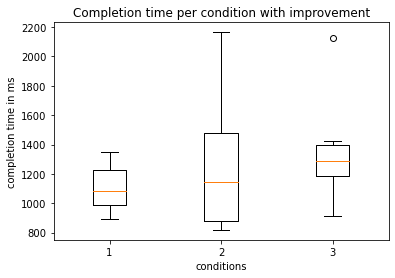

In [297]:
plt.boxplot([cond1_impr_true, cond2_impr_true, cond3_impr_true])
plt.title('Completion time per condition with improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')

### Completiontime per condition and user with improvement

In [303]:
cond_user1_true = df_impr_true['condition'][df_impr_true['user_id'] == 1]
cond_user1_time_true = df_impr_true['completion_time (ms)'][df_impr_true['user_id'] == 1]
cond_user2_true = df_impr_true['condition'][df_impr_true['user_id'] == 2]
cond_user2_time_true= df_impr_true['completion_time (ms)'][df_impr_true['user_id'] == 2]
cond_user3_true = df_impr_true['condition'][df_impr_true['user_id'] == 3]
cond_user3_time_true = df_impr_true['completion_time (ms)'][df_impr_true['user_id'] == 3]
cond_user4_true = df_impr_true['condition'][df_impr_true['user_id'] == 4]
cond_user4_time_true = df_impr_true['completion_time (ms)'][df_impr_true['user_id'] == 4]

(0.5, 3.5)

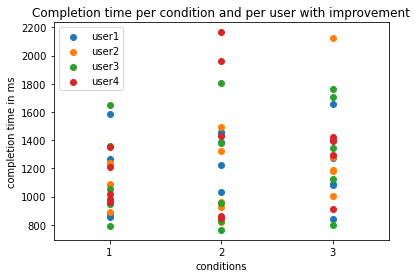

In [306]:
plt.scatter(cond_user1_true, cond_user1_time_true, label='user1')
plt.scatter(cond_user2_true, cond_user2_time_true, label='user2')
plt.scatter(cond_user3_true, cond_user3_time_true, label='user3')
plt.scatter(cond_user4_true, cond_user4_time_true, label='user4')
plt.legend(loc=0)
plt.title('Completion time per condition and per user with improvement')
plt.xlabel('conditions')
plt.ylabel('completion time in ms')
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Errors per condition with improvement

In [327]:
err_cond_impr = [1, 2, 3]
cond1_false_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == False].count() 
cond1_true_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == True].count()
cond2_false_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == False].count()
cond2_true_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == True].count()
cond3_false_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == False].count()
cond3_true_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == True].count()

(0.5, 3.5)

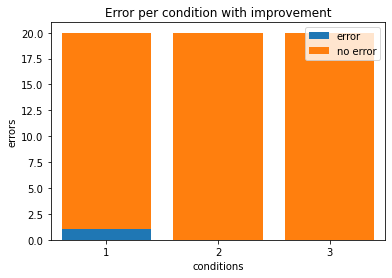

In [328]:
plt.bar(err_cond, (cond1_false_impr, cond2_false_impr, cond3_false_impr), label='error')
plt.bar(err_cond, (cond1_true_impr, cond2_true_impr, cond3_true_impr), bottom=(cond1_false_impr, cond2_false_impr, cond3_false_impr), label='no error')
plt.title('Error per condition with improvement')
plt.xlabel('conditions')
plt.ylabel('errors')
plt.legend()
plt.xticks([1, 2, 3], [1, 2, 3])
plt.xlim(0.5, 3.5)

### Error per condition and user with improvement

In [318]:
cond1_user1_false_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == False][df_impr_true['user_id'] == 1].count() 
cond1_user1_true_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == True][df_impr_true['user_id'] == 1].count()
cond1_user2_false_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == False][df_impr_true['user_id'] == 2].count() 
cond1_user2_true_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == True][df_impr_true['user_id'] == 2].count()
cond1_user3_false_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == False][df_impr_true['user_id'] == 3].count() 
cond1_user3_true_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == True][df_impr_true['user_id'] == 3].count()
cond1_user4_false_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == False][df_impr_true['user_id'] == 4].count() 
cond1_user4_true_impr = df_impr_true['error'][df_impr_true['condition'] == 1][df_impr_true['error'] == True][df_impr_true['user_id'] == 4].count()
cond2_user1_false_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == False][df_impr_true['user_id'] == 1].count() 
cond2_user1_true_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == True][df_impr_true['user_id'] == 1].count()
cond2_user2_false_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == False][df_impr_true['user_id'] == 2].count() 
cond2_user2_true_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == True][df_impr_true['user_id'] == 2].count()
cond2_user3_false_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == False][df_impr_true['user_id'] == 3].count() 
cond2_user3_true_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == True][df_impr_true['user_id'] == 3].count()
cond2_user4_false_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == False][df_impr_true['user_id'] == 4].count() 
cond2_user4_true_impr = df_impr_true['error'][df_impr_true['condition'] == 2][df_impr_true['error'] == True][df_impr_true['user_id'] == 4].count()
cond3_user1_false_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == False][df_impr_true['user_id'] == 1].count() 
cond3_user1_true_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == True][df_impr_true['user_id'] == 1].count()
cond3_user2_false_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == False][df_impr_true['user_id'] == 2].count() 
cond3_user2_true_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == True][df_impr_true['user_id'] == 2].count()
cond3_user3_false_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == False][df_impr_true['user_id'] == 3].count() 
cond3_user3_true_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == True][df_impr_true['user_id'] == 3].count()
cond3_user4_false_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == False][df_impr_true['user_id'] == 4].count() 
cond3_user4_true_impr = df_impr_true['error'][df_impr_true['condition'] == 3][df_impr_true['error'] == True][df_impr_true['user_id'] == 4].count()

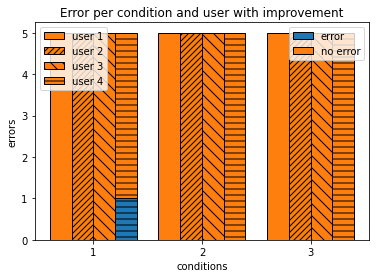

In [324]:
x  = np.arange(3)
plt.title('Error per condition and user with improvement')
width = 0.2

user1_false_impr = plt.bar(x - 0.3, (cond1_user1_false_impr, cond2_user1_false_impr, cond3_user1_false_impr), width, color='C0', 
                      edgecolor='#000000', label='error')
user1_true_impr = plt.bar(x - 0.3, (cond1_user1_true_impr, cond2_user1_true_impr, cond3_user1_true_impr), width, color='C1', 
                     edgecolor='#000000', bottom= (cond1_user1_false_impr, cond2_user1_false_impr, cond3_user1_false_impr), label='user 1')

user2_false_impr = plt.bar(x - 0.1, (cond1_user2_false_impr, cond2_user2_false_impr, cond3_user2_false_impr), width, color='C0',
                      edgecolor='#000000', hatch='////')
user2_true_impr = plt.bar(x - 0.1, (cond1_user2_true_impr, cond2_user2_true_impr, cond3_user2_true_impr), width, color='C1', 
                     edgecolor='#000000', hatch='////', bottom=(cond1_user2_false_impr, cond2_user2_false_impr, cond3_user2_false_impr), label="user 2")

user3_false_impr = plt.bar(x + 0.1, (cond1_user3_false_impr, cond2_user3_false_impr, cond3_user3_false_impr), width, color='C0',
                      edgecolor='#000000', hatch='\\\\')
user3_true_impr = plt.bar(x + 0.1, (cond1_user3_true_impr, cond2_user3_true_impr, cond3_user3_true_impr), width, color='C1', 
                     edgecolor='#000000', hatch='\\\\', bottom=(cond1_user3_false_impr, cond2_user3_false_impr, cond3_user3_false_impr), label='user 3')

user4_false_impr = plt.bar(x + 0.3, (cond1_user4_false_impr, cond2_user4_false_impr, cond3_user4_false_impr), width, color='C0',
                      edgecolor='#000000', hatch='--')
user4_true_impr = plt.bar(x + 0.3, (cond1_user4_true_impr, cond2_user4_true_impr, cond3_user4_true_impr), width, color='C1', 
                     edgecolor='#000000', hatch='--', bottom= (cond1_user4_false_impr, cond2_user4_false_impr, cond3_user4_false_impr), label='user 4')

plt.xlabel('conditions')
plt.xticks(x, ['1', '2', '3'])
plt.ylabel('errors')

first_legend = plt.legend(handles=[user1_true_impr, user2_true_impr, user3_true_impr, user4_true_impr], loc=2)

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend([user1_false_impr, user1_true_impr], ['error', 'no error'])

## Result

The Results are divided in  two parts, first we want to discuss the results of the standard technique.
As one can see in the box plot “Completion time per condition without improvement”, the completion time increased from condition one to three. Due to the few participants none of the results are statistically significant, but one can see that the more demanding conditions with more stimuli have taken more time to complete. This results can also be seen in “Error per condition without improvement” where there are no errors in condition one, one in condition two and three in condition three.
We had 4 participants. In “Completion time per condition and user without improvement” one can see that no subject stands out as particularly fast or slow. The completion time is distributed among the subjects and each has an outlier upwards.
“Error per condition and user without improvement” shows that, overall, the task was completed without many errors, two participants finished without any errors, user one and four had two. It also shows that three of these errors occurred in the most difficult condition three, one in condition two and none in the easiest condition one. On the whole, for our first hypothesis, completion time and errors increase if the user is exposed to multiple stimuli, can be confirmed with the data obtained in our experiment. The completion time of the users has become slower, the more difficult the conditions were and the errors have increased.

The second part of our experiment was performed with an improved pointing technique. For the evaluation of these results, 4 charts were created and in order to allow a later comparison, they were structured in the same way as in the first part.
The “Completion time per condition with improvement” also shows an increase of time from condition one to three, the participants took longer to complete condition three than condition one. The box plot for condition two shows a large outlier and is also generally broader than that of the other conditions, but overall  one can place the mean value of the completion time between condition one and two. Also, the results of “Completion time per condition and user with improvement” correspond to those of the first part, no user completed the task particularly quickly, each of the four test subjects have outliers upwards in the conditions. Therefore, no user can be particularly emphasized.
Very few mistakes were made as one can see in ”Error per condition with improvement”, with only one error in condition one. Therefore, we see a contrary tendency to our hypothesis, since there are no errors in the difficult conditions. The error was made by participant four, as shown in “Error per condition and user with improvement”. 

Overall one can see, that all users completed the tasks very well. The results for completion time are very similar, with, as previously mentioned, no user standing out. Errors where only made by users one and four, with two error by user one and three by user four. 

Our second hypothesis, completion time and errors decrease with the use of the improved pointing technique, can also be accepted with the results of this study. Four out of the five errors were made without the improved pointing technique and only one with it. Also the completion time decreased, without improved pointing technique the mean of condition one, around 1250ms, condition two, around 1600ms and condition three, around 2000ms were slower than with the improved pointing technique with the mean of condition one, around 1500ms, condition two, around 1200ms and condition three, around 1200ms. 
Therefore we can accept both our hypothesis. But due to the few and biased participants none of the results are statistically significant and to get better results, another study with a broader and more diverse sample of subjects should be conducted